In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [2]:
from sklearn.decomposition import PCA
dataset = pd.read_csv("data.csv", index_col=0)
dataset['y'] = dataset['y'].apply(lambda x: 1 if x == 1 else 0)
X = dataset.drop(columns=['y'])
y = dataset['y']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=5)

# Fit and transform the data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Epoch 1/100


c:\Codes\ads\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1840/1840 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9017 - f1_score: 0.3360 - loss: 0.2397 - val_accuracy: 0.7978 - val_f1_score: 0.3363 - val_loss: 1.4504
Epoch 2/100
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9581 - f1_score: 0.3248 - loss: 0.1244 - val_accuracy: 0.7978 - val_f1_score: 0.3363 - val_loss: 1.3460
Epoch 3/100
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9501 - f1_score: 0.3462 - loss: 0.1300 - val_accuracy: 0.7978 - val_f1_score: 0.3363 - val_loss: 1.4856
Epoch 4/100
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - accuracy: 0.9533 - f1_score: 0.3365 - loss: 0.1314 - val_accuracy: 0.7978 - val_f1_score: 0.3363 - val_loss: 1.8325
Epoch 5/100
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9591 - f1_score: 0.3306 - loss: 0.1140 - val_accuracy: 0.7978 - val_f1_score: 0.3363 - val_loss: 1.1714
Epoch 6/100
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9577 - f1_score: 0.3318 - loss: 0.1151 - val_accuracy: 0.7978 - va

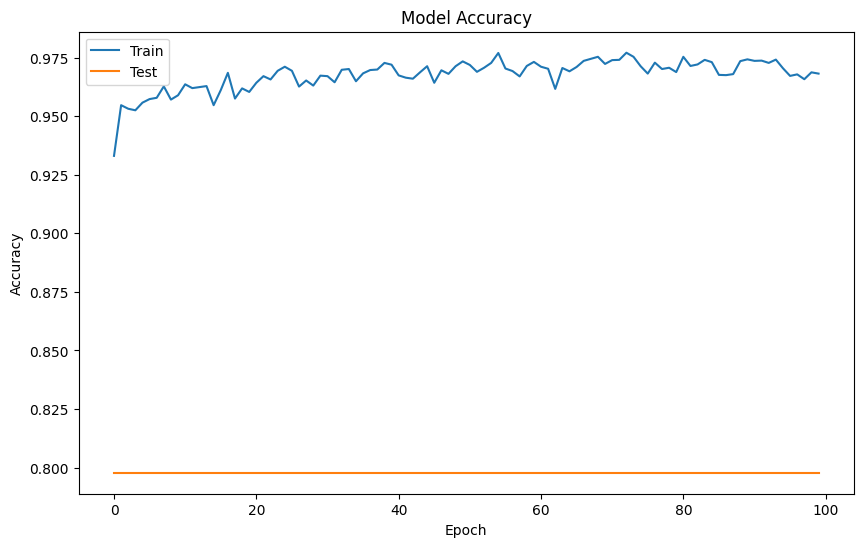

In [3]:
lstm_model = Sequential([
    LSTM(units=64, input_shape=(X_train_scaled.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

model = lstm_model


X_train_lstm = np.reshape(
    X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = np.reshape(
    X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy', 'f1_score'])
history = model.fit(X_train, y_train, epochs=100, batch_size=5,
                    validation_data=(X_test_scaled, y_test), verbose=1)
y_pred = (model.predict(X_test_lstm) > 0.5).astype(int)


accuracy = model.evaluate(X_test, y_test)
print('Accuracy: ' % (accuracy))

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/100


c:\Codes\ads\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1840/1840 ━━━━━━━━━━━━━━━━━━━━ 126s 67ms/step - accuracy: 0.8930 - f1_score: 0.3310 - loss: 0.2726 - val_accuracy: 0.7978 - val_f1_score: 0.3363 - val_loss: 1.1850
Epoch 2/100
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 114s 62ms/step - accuracy: 0.9436 - f1_score: 0.3278 - loss: 0.1411 - val_accuracy: 0.7978 - val_f1_score: 0.3363 - val_loss: 1.3513
Epoch 3/100
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 115s 62ms/step - accuracy: 0.9503 - f1_score: 0.3217 - loss: 0.1289 - val_accuracy: 0.7978 - val_f1_score: 0.3363 - val_loss: 1.0489
Epoch 4/100
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 115s 62ms/step - accuracy: 0.9587 - f1_score: 0.3303 - loss: 0.1085 - val_accuracy: 0.7978 - val_f1_score: 0.3363 - val_loss: 0.9267
Epoch 5/100
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 116s 63ms/step - accuracy: 0.9542 - f1_score: 0.3364 - loss: 0.1156 - val_accuracy: 0.7978 - val_f1_score: 0.3363 - val_loss: 1.2389
Epoch 6/100
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 115s 62ms/step - accuracy: 0.9587 - f1_score: 0.3422 - loss: 0.1004 - val_accuracy: 0.797

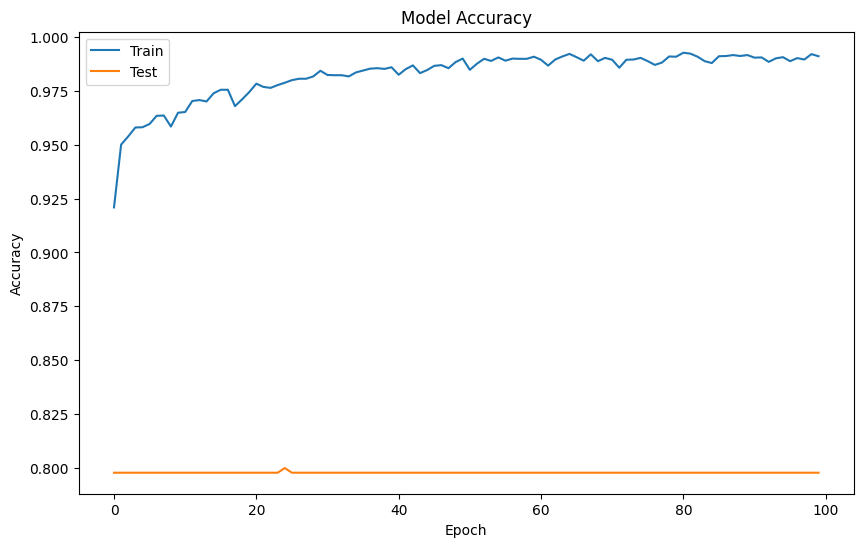

In [4]:
lstm_model = Sequential([
    LSTM(units=64, return_sequences=True,
         input_shape=(X_train_scaled.shape[1], 1)),
    LSTM(units=64, return_sequences=True),
    LSTM(units=64),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model = lstm_model


X_train_lstm = np.reshape(
    X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = np.reshape(
    X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy', 'f1_score'])
history = model.fit(X_train, y_train, epochs=100, batch_size=5,
                    validation_data=(X_test_scaled, y_test), verbose=1)
y_pred = (model.predict(X_test_lstm) > 0.5).astype(int)


accuracy = model.evaluate(X_test, y_test)
print('Accuracy: ' % (accuracy ))

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/100


c:\Codes\ads\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1840/1840 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9123 - f1_score: 0.3327 - loss: 0.2329 - val_accuracy: 0.7978 - val_f1_score: 0.3363 - val_loss: 0.6895
Epoch 2/100
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9497 - f1_score: 0.3305 - loss: 0.1376 - val_accuracy: 0.7978 - val_f1_score: 0.3363 - val_loss: 0.6864
Epoch 3/100
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9533 - f1_score: 0.3289 - loss: 0.1333 - val_accuracy: 0.7978 - val_f1_score: 0.3363 - val_loss: 0.7923
Epoch 4/100
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9582 - f1_score: 0.3259 - loss: 0.1141 - val_accuracy: 0.7978 - val_f1_score: 0.3363 - val_loss: 0.7668
Epoch 5/100
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9549 - f1_score: 0.3372 - loss: 0.1232 - val_accuracy: 0.7978 - val_f1_score: 0.3363 - val_loss: 0.8442
Epoch 6/100
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9559 - f1_score: 0.3258 - loss: 0.1150 - val_accuracy: 0.7978 - va

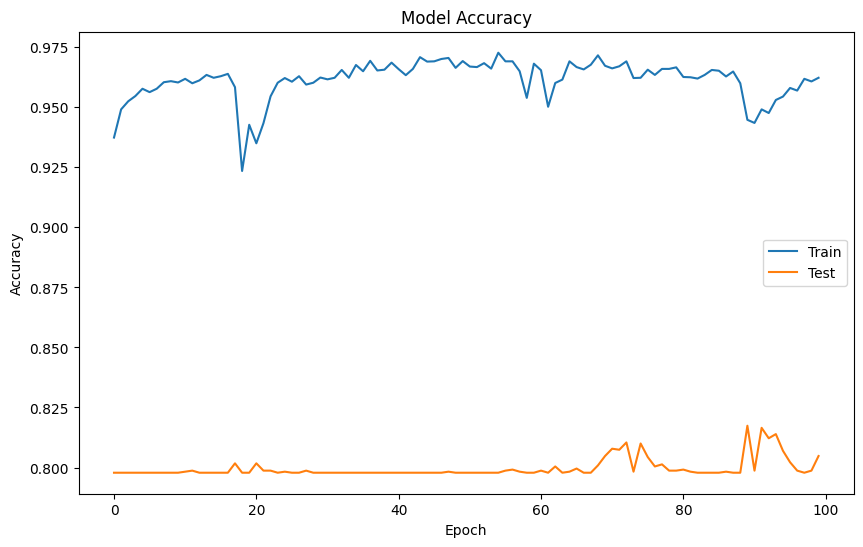

In [5]:


# Initialize models
lstm_model = Sequential([
    LSTM(units=64, input_shape=(X_train_pca.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

model = lstm_model


X_train_lstm = np.reshape(X_train_pca, (X_train_pca.shape[0], X_train_pca.shape[1], 1))
X_test_lstm = np.reshape(X_test_pca, (X_test_pca.shape[0], X_test_pca.shape[1], 1))
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy','f1_score'])
history = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_data=(X_test_pca, y_test), verbose=1)
y_pred = (model.predict(X_test_lstm) > 0.5).astype(int)


accuracy = model.evaluate(X_test, y_test)
print('Accuracy: ' % (accuracy))

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/100
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9397 - f1_score: 0.3389 - loss: 0.1956 - val_accuracy: 0.9622 - val_f1_score: 0.3363 - val_loss: 0.1162
Epoch 2/100
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9532 - f1_score: 0.3374 - loss: 0.1244 - val_accuracy: 0.9613 - val_f1_score: 0.3363 - val_loss: 0.1001
Epoch 3/100
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9550 - f1_score: 0.3394 - loss: 0.1278 - val_accuracy: 0.9617 - val_f1_score: 0.3363 - val_loss: 0.1049
Epoch 4/100
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9566 - f1_score: 0.3244 - loss: 0.1217 - val_accuracy: 0.9626 - val_f1_score: 0.3363 - val_loss: 0.0990
Epoch 5/100
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9535 - f1_score: 0.3443 - loss: 0.1241 - val_accuracy: 0.9622 - val_f1_score: 0.3363 - val_loss: 0.1023
Epoch 6/100
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9554 - f1_score: 0.3439 - loss: 0.1240 - val_accuracy: 0.9630 - v

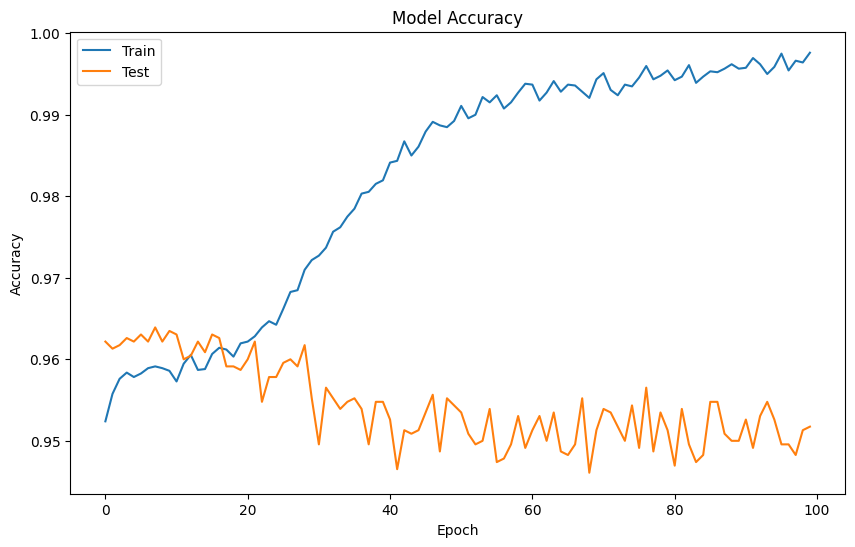

In [7]:
# Initialize models
lstm_model = Sequential([
    LSTM(units=64, return_sequences=True,
         input_shape=(X_train_pca.shape[1], 1)),
    LSTM(units=64, return_sequences=True),
    LSTM(units=64),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model = lstm_model

X_train_lstm = np.reshape(
    X_train_pca, (X_train_pca.shape[0], X_train_pca.shape[1], 1))
X_test_lstm = np.reshape(
    X_test_pca, (X_test_pca.shape[0], X_test_pca.shape[1], 1))
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy', 'f1_score'])
history = model.fit(X_train_lstm, y_train, epochs=100, batch_size=5,
                    validation_data=(X_test_lstm, y_test), verbose=1)
y_pred = (model.predict(X_test_lstm) > 0.5).astype(int)

accuracy = model.evaluate(X_test, y_test)
print(accuracy)

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()